In [71]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u
from glob import glob
from scipy.optimize import curve_fit

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

'0.03'

/Users/james/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


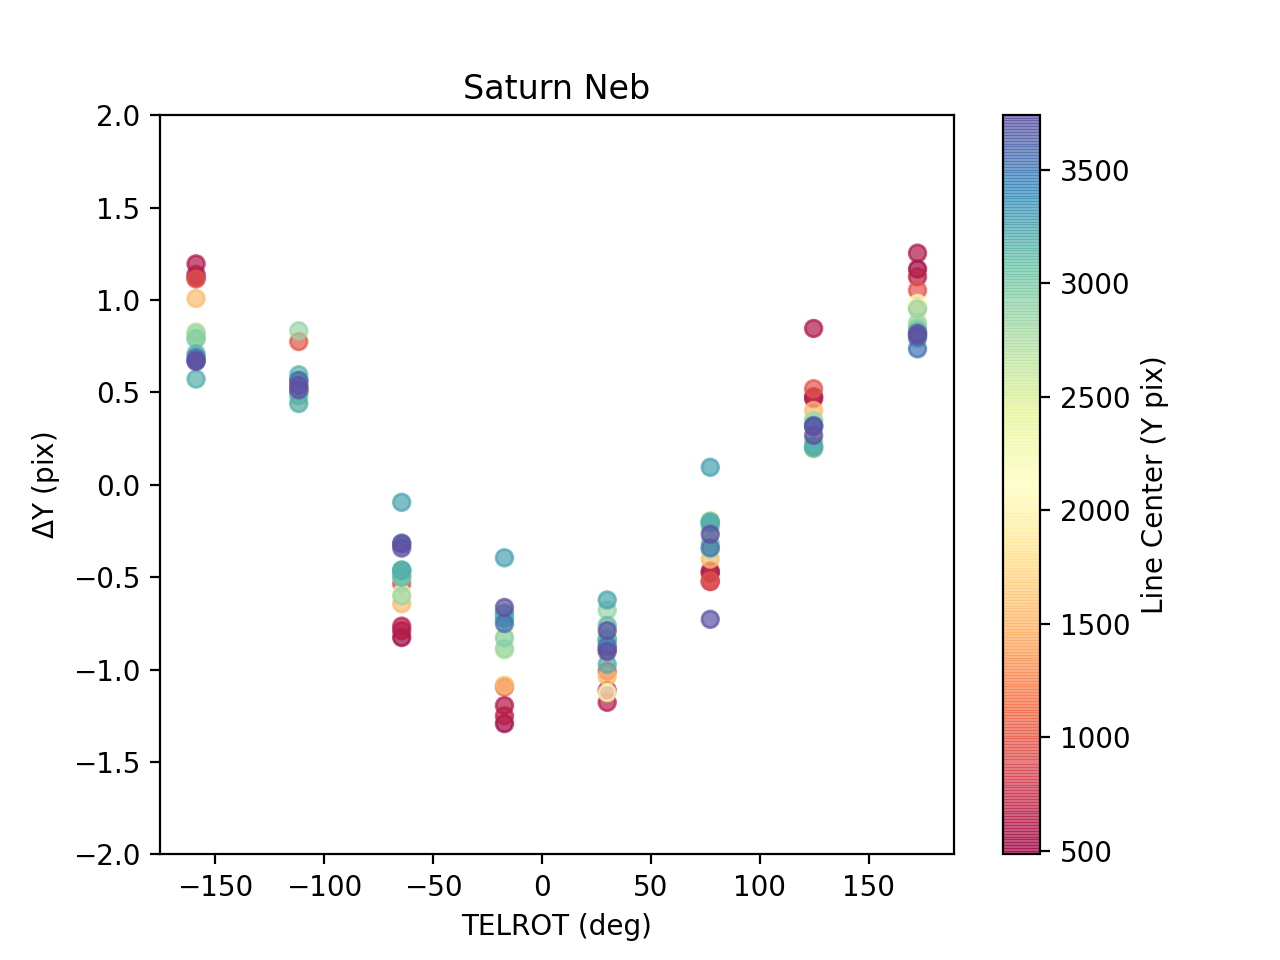

In [184]:
files = glob('saturn*.fits')
TELROT = np.zeros(len(files))

# for k in range(1):
for k in range(len(files)):
    img_k = kosmos.proc(files[k], trim=False, Waxis=0)
    TELROT[k] = img_k.header['TELROT']
    
    trace = kosmos.trace(img_k, nbins=4, Waxis=0, window=100)
    ex_k, sky_k = kosmos.BoxcarExtract(img_k, trace, apwidth=10, skysep=15, skywidth=10, Waxis=0)

    if k==0:
        pp, pw = kosmos.find_peaks(ex_k.spectral_axis.value, ex_k.flux.value, pthreshold=.95, pwidth=15)
        cntr = np.zeros((len(files), len(pp)))
    
    for j in range(len(pp)):
        rng = np.where((np.abs(ex_k.spectral_axis.value - pp[j]) < 10))[0]
        # [peak height, baseline, Y location of peak, width guess]
        peak_guess = [np.nanmax(ex_k.flux.value[rng]), np.nanmedian(ex_k.flux.value), pp[j], 5.]

        # fit a Gaussian to peak 
        popt, pcov = curve_fit(kosmos.apextract._gaus, ex_k.spectral_axis.value[rng], ex_k.flux.value[rng], p0=peak_guess)

        cntr[k,j] = popt[2]

ss = np.argsort(TELROT)
# for j in range(len(pp)):
#     plt.plot(TELROT[ss], cntr[:,j][ss] - np.median(cntr[:,j]), alpha=0.5)
    
cntr_dx = cntr.copy()*0
TELROT_dx = cntr.copy()*0
for j in range(len(pp)):
    cntr_dx[:,j] = cntr[:,j][ss] - np.median(cntr[:,j])
    TELROT_dx[:,j] = TELROT[ss]

plt.scatter(TELROT_dx.ravel(), cntr_dx.ravel(), c=cntr.ravel(), cmap=plt.cm.Spectral, alpha=0.7)
plt.ylim(-2, 2)
plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta$Y (pix)')
cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')
plt.title('Saturn Neb')
plt.savefig('saturn_neb_dx.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

x1, y1, c1 = TELROT_dx.ravel(), cntr_dx.ravel(), cntr.ravel()

<IPython.core.display.Javascript object>


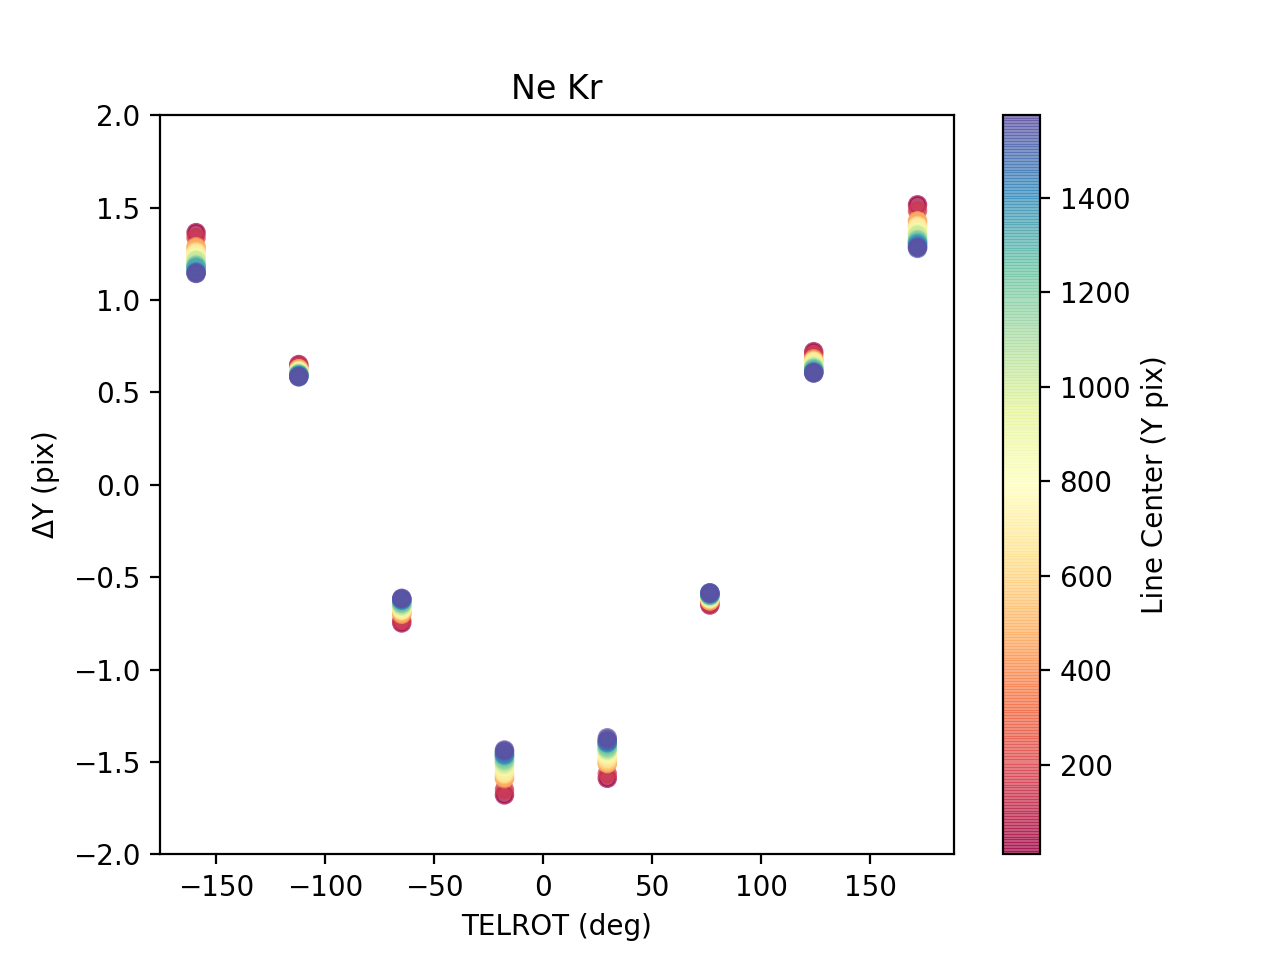

In [185]:
files = glob('Ne_Kr*.fits')
TELROT = np.zeros(len(files))

# for k in range(1):
for k in range(len(files)):
    img_k = kosmos.proc(files[k], trim=False, Waxis=0)
    TELROT[k] = img_k.header['TELROT']
    
#     trace = kosmos.trace(img_k, nbins=4, Waxis=0)#, window=100)
    ex_k, sky_k = kosmos.BoxcarExtract(img_k, trace, apwidth=10, skysep=15, skywidth=10, Waxis=0)

    if k==0:
        pp, pw = kosmos.find_peaks(ex_k.spectral_axis.value, ex_k.flux.value, pthreshold=.95, pwidth=15)
        cntr = np.zeros((len(files), len(pp)))
    
    for j in range(len(pp)):
        rng = np.where((np.abs(ex_k.spectral_axis.value - pp[j]) < 10))[0]
        # [peak height, baseline, Y location of peak, width guess]
        peak_guess = [np.nanmax(ex_k.flux.value[rng]), np.nanmedian(ex_k.flux.value), pp[j], 5.]

        # fit a Gaussian to peak 
        popt, pcov = curve_fit(kosmos.apextract._gaus, ex_k.spectral_axis.value[rng], ex_k.flux.value[rng], p0=peak_guess)

        cntr[k,j] = popt[2]

ss = np.argsort(TELROT)
# for j in range(len(pp)):
#     plt.plot(TELROT[ss], cntr[:,j][ss] - np.median(cntr[:,j]), alpha=0.5)
    
cntr_dx = cntr.copy()*0
TELROT_dx = cntr.copy()*0
for j in range(len(pp)):
    cntr_dx[:,j] = cntr[:,j][ss] - np.median(cntr[:,j])
    TELROT_dx[:,j] = TELROT[ss]
    
plt.scatter(TELROT_dx.ravel(), cntr_dx.ravel(), c=cntr.ravel(), cmap=plt.cm.Spectral, alpha=0.7)

plt.ylim(-2, 2)
plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta$Y (pix)')
cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')
plt.title('Ne Kr')
plt.savefig('Ne_Kr_dx.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

x2, y2, c2 = TELROT_dx.ravel(), cntr_dx.ravel(), cntr.ravel()

<IPython.core.display.Javascript object>


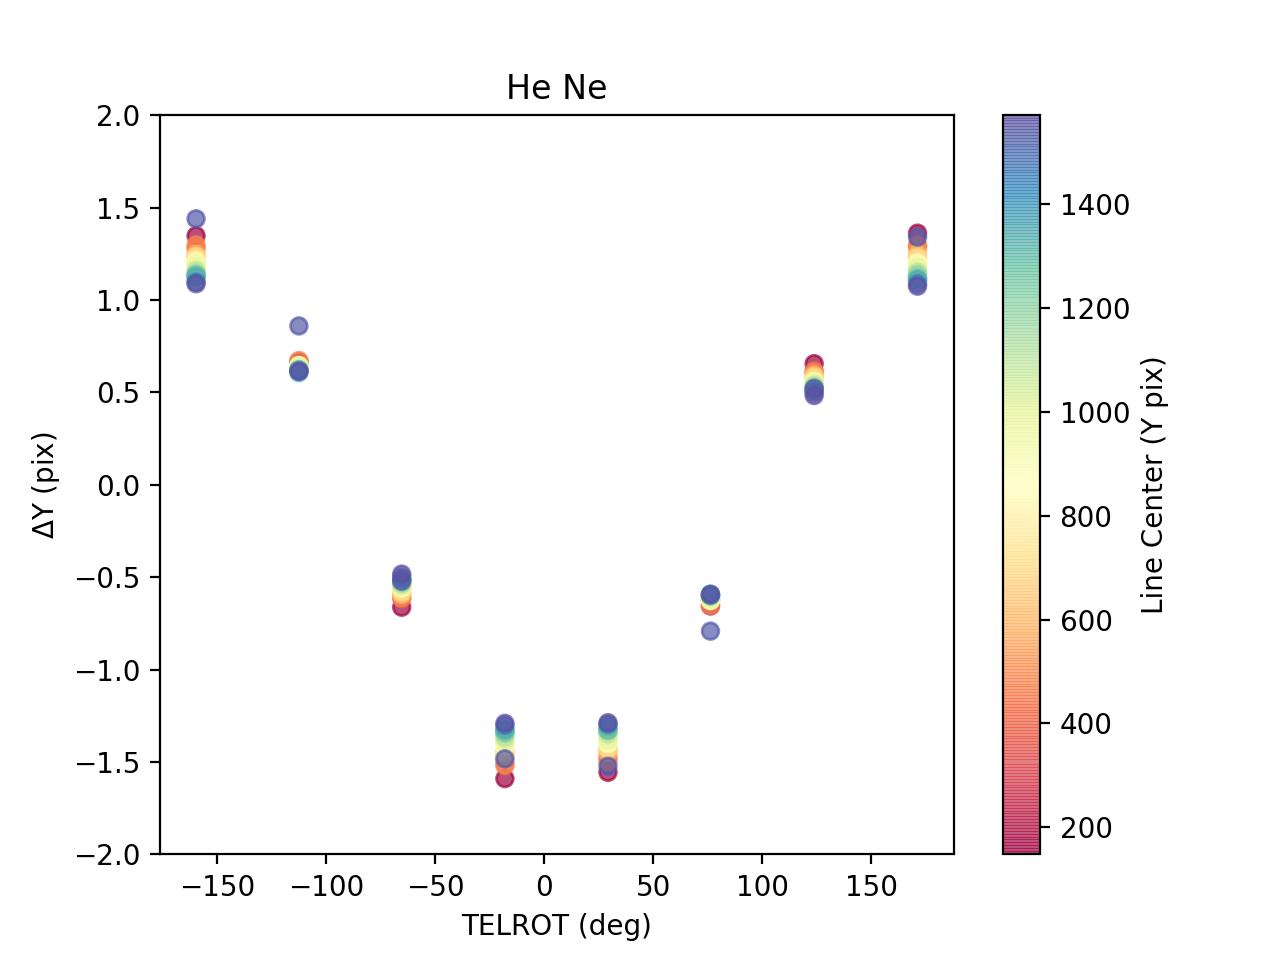

In [186]:
files = glob('He_Ne*.fits')
TELROT = np.zeros(len(files))

# for k in range(1):
for k in range(len(files)):
    img_k = kosmos.proc(files[k], trim=False, Waxis=0)
    TELROT[k] = img_k.header['TELROT']
    
#     trace = kosmos.trace(img_k, nbins=4, Waxis=0)#, window=100)
    ex_k, sky_k = kosmos.BoxcarExtract(img_k, trace, apwidth=10, skysep=15, skywidth=10, Waxis=0)

    if k==0:
        pp, pw = kosmos.find_peaks(ex_k.spectral_axis.value, ex_k.flux.value, pthreshold=.95, pwidth=15)
        cntr = np.zeros((len(files), len(pp)))
    
    for j in range(len(pp)):
        rng = np.where((np.abs(ex_k.spectral_axis.value - pp[j]) < 10))[0]
        # [peak height, baseline, Y location of peak, width guess]
        peak_guess = [np.nanmax(ex_k.flux.value[rng]), np.nanmedian(ex_k.flux.value), pp[j], 5.]

        # fit a Gaussian to peak 
        popt, pcov = curve_fit(kosmos.apextract._gaus, ex_k.spectral_axis.value[rng], ex_k.flux.value[rng], p0=peak_guess)

        cntr[k,j] = popt[2]

ss = np.argsort(TELROT)
# for j in range(len(pp)):
#     plt.plot(TELROT[ss], cntr[:,j][ss] - np.median(cntr[:,j]), alpha=0.5)
    
cntr_dx = cntr.copy()*0
TELROT_dx = cntr.copy()*0
for j in range(len(pp)):
    cntr_dx[:,j] = cntr[:,j][ss] - np.median(cntr[:,j])
    TELROT_dx[:,j] = TELROT[ss]

plt.scatter(TELROT_dx.ravel(), cntr_dx.ravel(), c=cntr.ravel(), cmap=plt.cm.Spectral, alpha=0.7)

plt.ylim(-2, 2)
plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta$Y (pix)')
cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')
plt.title('He Ne')
plt.savefig('He_Ne_dx.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

x3, y3, c3 = TELROT_dx.ravel(), cntr_dx.ravel(), cntr.ravel()

<IPython.core.display.Javascript object>


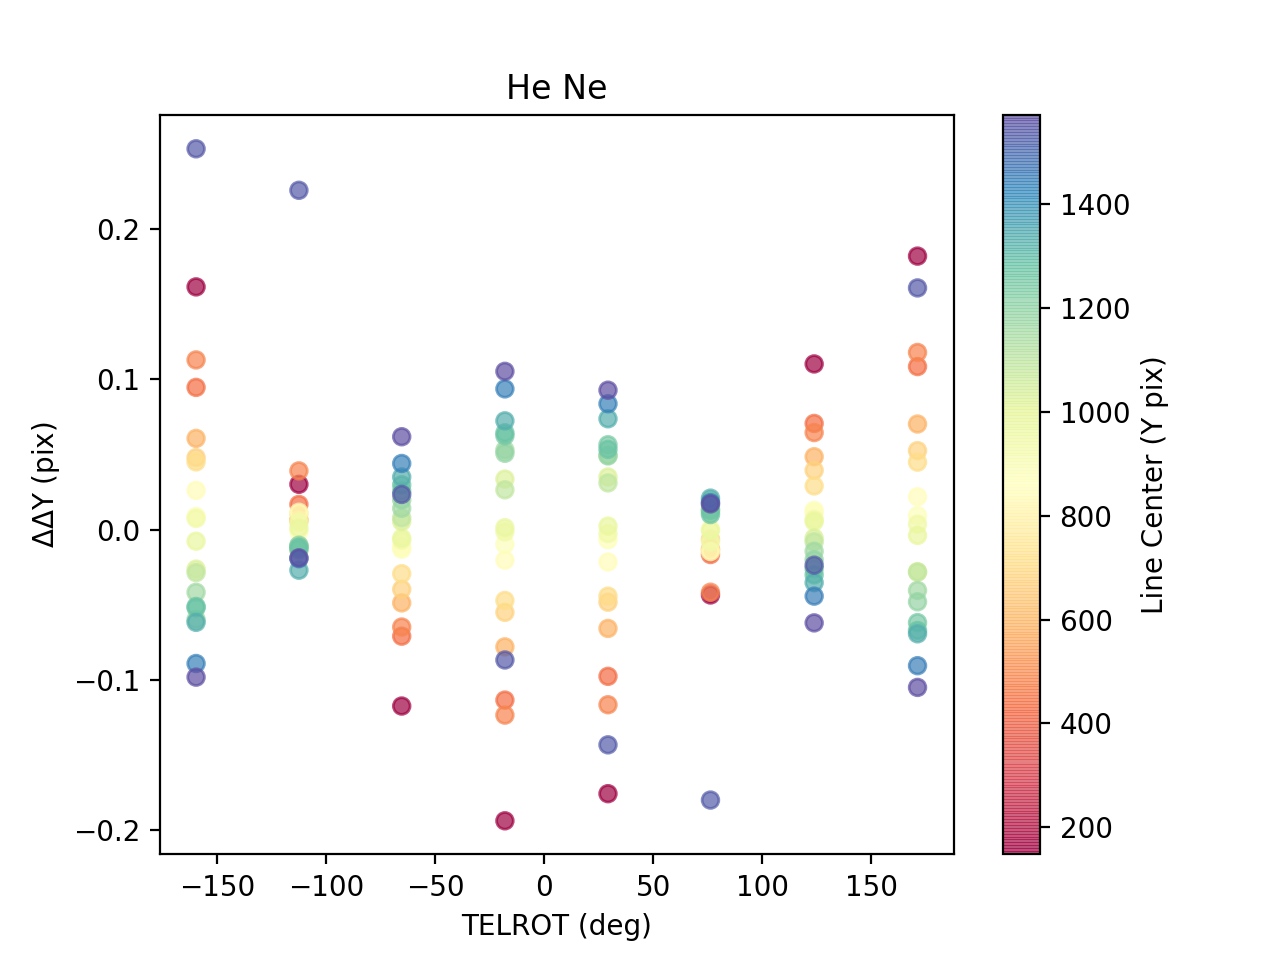

In [187]:
cntr_dx2 = cntr.copy()*0
for k in range(len(TELROT)):
    cntr_dx2[k,:] = cntr_dx[k,:] - np.median(cntr_dx[k,:])


plt.scatter(TELROT_dx.ravel(), cntr_dx2.ravel(), c=cntr.ravel(), cmap=plt.cm.Spectral, alpha=0.7)

# plt.ylim(-2, 2)
plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta\Delta$Y (pix)')
cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')
plt.title('He Ne')
plt.savefig('He_Ne_ddx.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

dy3 = cntr_dx2.ravel()

<IPython.core.display.Javascript object>


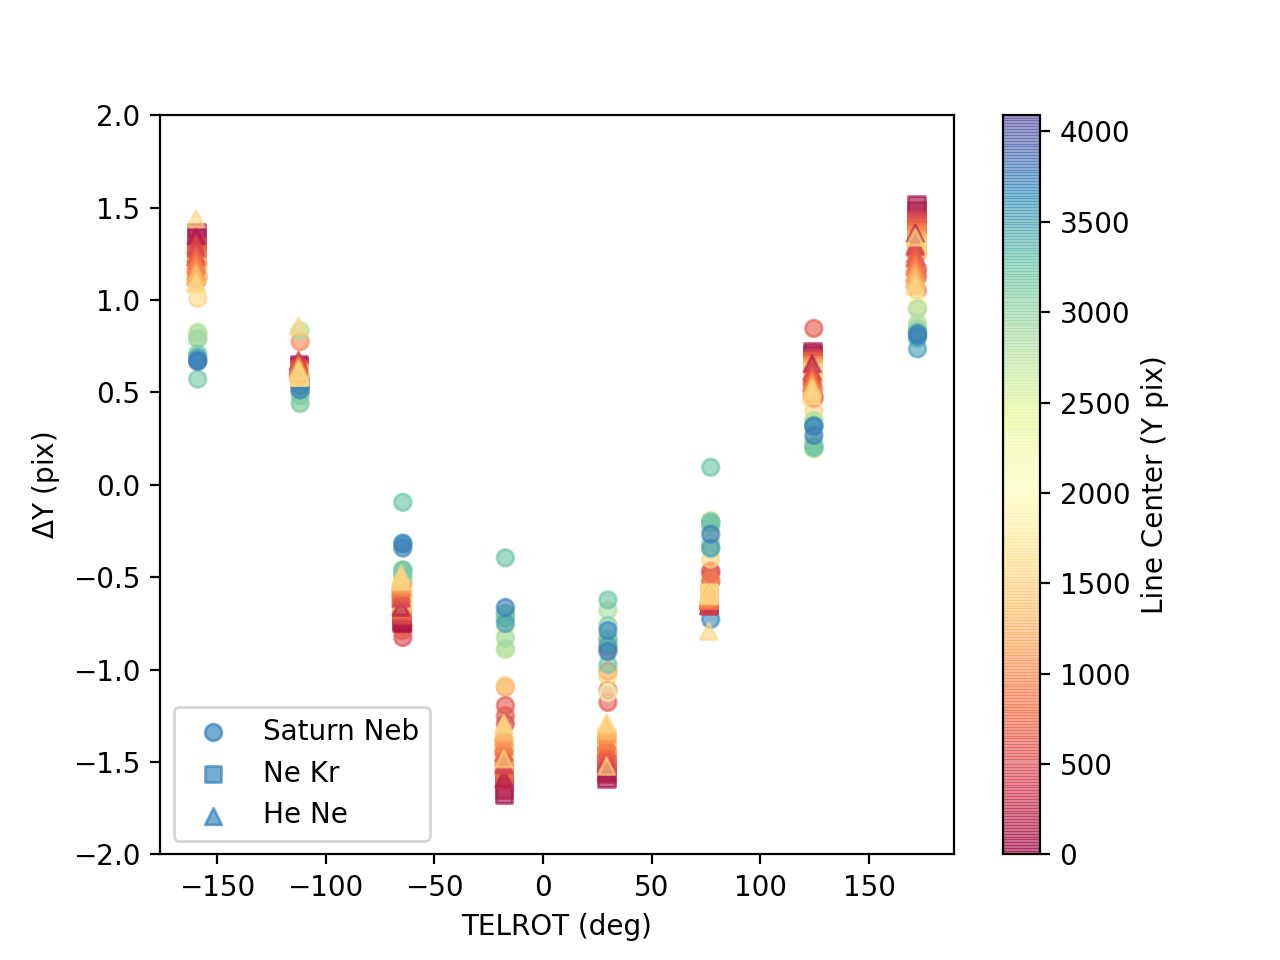

In [202]:
plt.scatter(x1,y1,c=c1, cmap=plt.cm.Spectral, marker='o', alpha=0.6, label='Saturn Neb')
plt.clim(0, 4090)

plt.scatter(x2,y2,c=c2, cmap=plt.cm.Spectral, marker='s', alpha=0.6, label='Ne Kr')
plt.clim(0, 4090)

plt.scatter(x3,y3,c=c3, cmap=plt.cm.Spectral, marker='^', alpha=0.6, label='He Ne')
plt.clim(0, 4090)

plt.legend()

cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')

plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta$Y (pix)')
plt.clim(0, 4090)
plt.ylim(-2,2)
plt.savefig('combined_dx.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

<IPython.core.display.Javascript object>


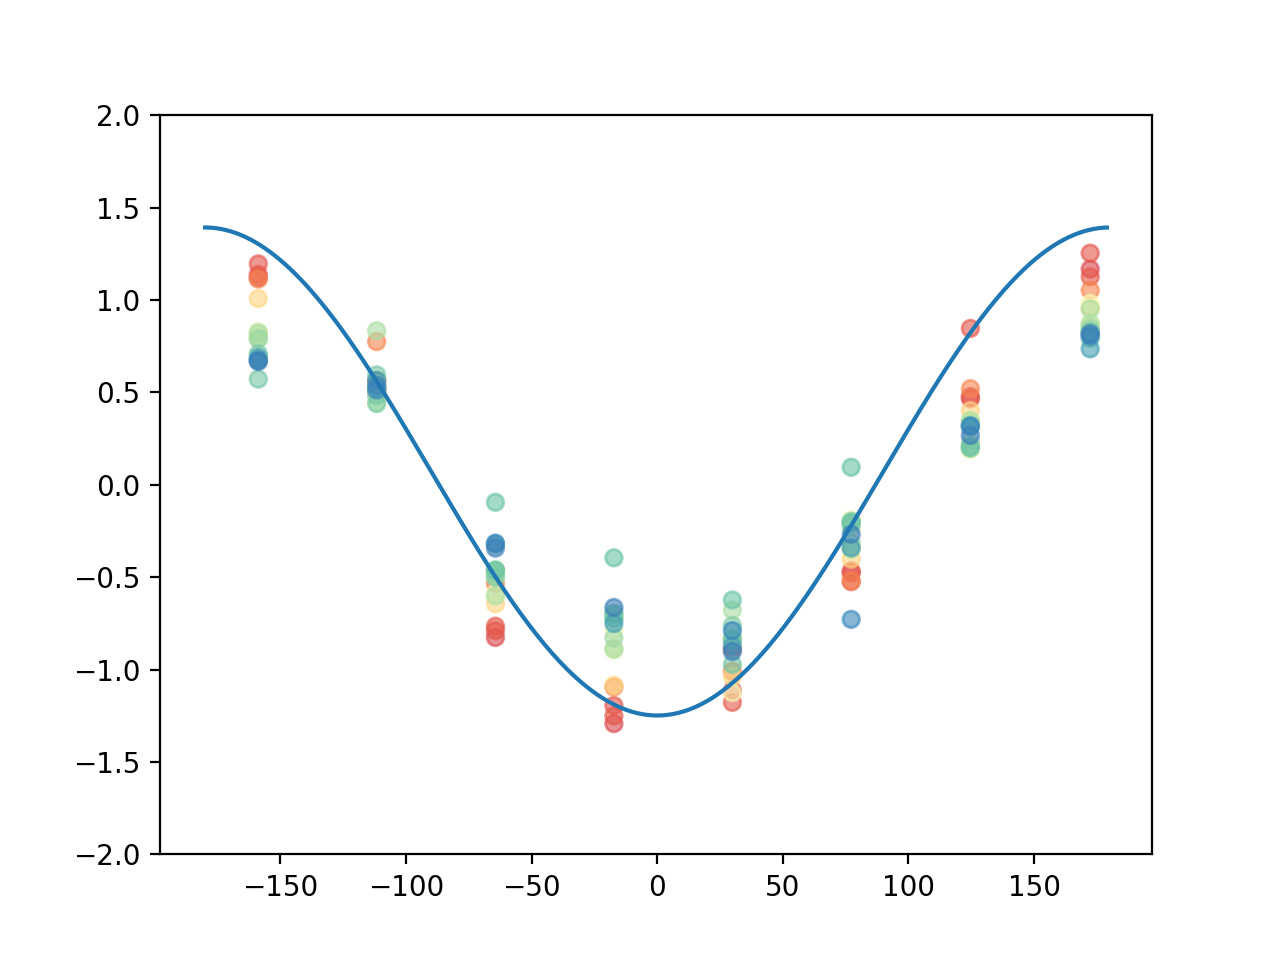

(-2.0, 2.0)

In [213]:
def sinefunc(x, a, b):
    return a * np.sin(x*np.pi/180 - np.pi/2) + b

rot = np.arange(-180,180,1)

p0 = [1, -1]
popt, pcov = curve_fit(sinefunc, x1, y1, p0=p0)

plt.scatter(x1,y1,c=c1, cmap=plt.cm.Spectral, marker='o', alpha=0.6, label='Saturn Neb')
plt.clim(0, 4090)
plt.plot(rot, sinefunc(rot, *popt))
plt.ylim(-2,2)

<IPython.core.display.Javascript object>


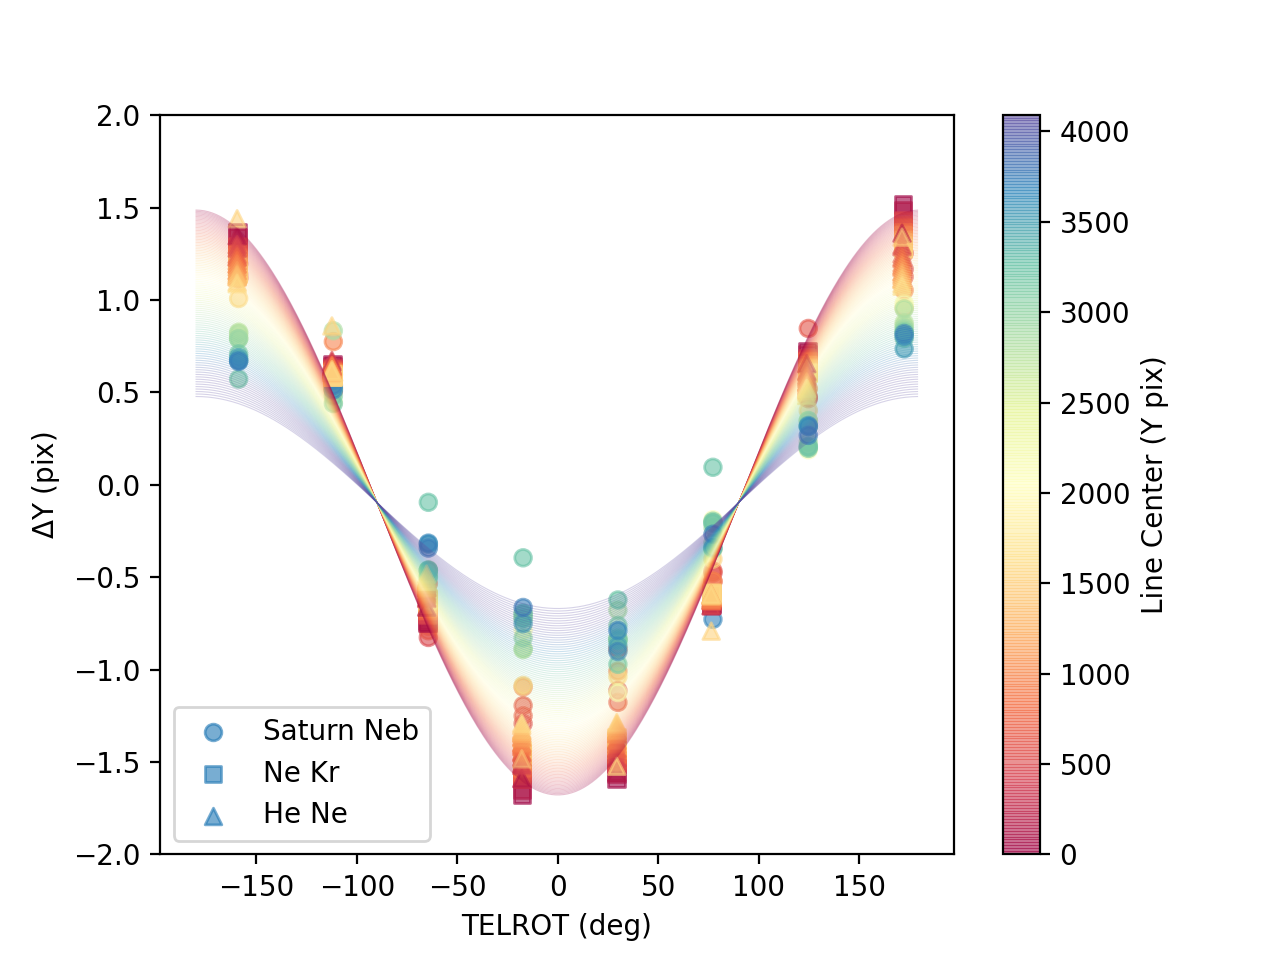

In [254]:
def sinefuncXY(xy, a, b, c, d):
    x,y = xy
    return (a*y*y + b*y + c) * np.sin(x*np.pi/180 - np.pi/2) + d

rot = np.arange(-180,180,1)

p0 = [0.1, -.01, 1, -1]



plt.scatter(x1,y1,c=c1, cmap=plt.cm.Spectral, marker='o', alpha=0.6, label='Saturn Neb')
plt.clim(0, 4090)

plt.scatter(x2,y2,c=c2, cmap=plt.cm.Spectral, marker='s', alpha=0.6, label='Ne Kr')
plt.clim(0, 4090)

plt.scatter(x3,y3,c=c3, cmap=plt.cm.Spectral, marker='^', alpha=0.6, label='He Ne')
plt.clim(0, 4090)
plt.legend()
cb = plt.colorbar()
cb.set_label('Line Center (Y pix)')

xall = np.concatenate((x1,x2,x3))
yall = np.concatenate((y1,y2,y3))
call = np.concatenate((c1,c2,c3))
Aok = np.where((yall > -2) & (yall < 2))[0]

poptall, pcov = curve_fit(sinefuncXY, (xall[Aok], call[Aok]), yall[Aok], p0=p0)

# thank you https://stackoverflow.com/a/49184882
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=call.min(), vmax=call.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Spectral)
cmap.set_array([])

lcy = np.linspace(0,4096,100)
for k in range(100):
    plt.plot(rot, sinefuncXY((rot, np.ones_like(rot)*lcy[k]), *poptall), 
             c=cmap.to_rgba(lcy[k]), alpha=0.25, lw=0.4)
plt.ylim(-2,2)


plt.xlabel('TELROT (deg)')
plt.ylabel('$\Delta$Y (pix)')
plt.ylim(-2,2)
plt.savefig('combined_dx_fit.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [259]:
np.mean(np.abs(yall[Aok] - sinefuncXY((xall[Aok], call[Aok]), *poptall)))

0.11665388100294126

In [261]:
poptall

array([-1.99405377e-08, -1.64605706e-04,  1.58241790e+00, -9.58180045e-02])